# Final Project Report

* Class: DS 5100
* Student Name: Hannah Richardson
* Student Net ID: zhx9yf
* This URL: https://github.com/hannahmrichardson/Monte-Carlo-Final-Project

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/hannahmrichardson/Monte-Carlo-Final-Project

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.
```py
import pandas as pd
import numpy as np
import random
import itertools

class Die: 
    '''
    The purpose of this file is to play a game. 
    
    to create a single die. Each die has a certain number of sides, also known as faces,
    that is passed into the file. Each side contains a unique symbol.
    Each die side has a weight. The weight is a positive number, initialized as 1 and can be changed later. The weight 
    determines the probability that the die will land on that face, fair dice will 
    have equal weights and unfair will have different weight values. 

    A die can be any discrete random variable associated with a stochastic process, 
    such as using a deck of cards, flipping a coin, rolling an actual die, or speaking a language.

    The die has one behavior, to be rolled a certain number of times. 

    Summary: This class can create a die, roll a die, modify a dies face weight, and return the current state of the weight. 
    Current state includes the dies faces and their respective weights. 
    '''
    def __init__(self, faces): 
        '''
        PURPOSE 
        Given a numpy array of faces, create a single die. Upon creation each die has a set of faces and each die 
        has a weight value, initialized to 1. 
    
        INPUTS
        faces    NumPy array of faces. Array may be strings or numbers but values must be distinct.
        '''

        #throw an error if not a numpy array
        if type(faces) is np.ndarray:
            self.faces = faces 
        else:
            raise TypeError("The faces variable must be of type numpy array")    

        #check if the values in the array are distinct, if not raise ValueError
        value_list = []
        for i in faces:
            if i in value_list:
                raise ValueError("All values in the faces array must be unique")
            else:
                value_list.append(i)
        
        weights = 1.0
        df_die = pd.DataFrame(
                {
                'faces':faces, 
                'weights':weights
                }) 
        self._df_die = df_die.set_index('faces')
    
    #method to change the weight of a single side    
    def change_side_weight(self, face_value, new_weight):
        '''
        PURPOSE
        Change the weight of a single face value for a dice.
    
        INPUTS
        face_value    a face value that is present on the dice, this is the die face that the user wants 
                      to change the weight of.
        new_weight    a numeric value (integer, float, or castable as numeric). The weight will change 
                      to this numeric value.
        '''
        #check to see if the face passed is a valid value 
        if face_value not in self.faces:
            #if not a valid value, raise an IndexError
            raise IndexError("The face value provided is not on this die") 
       
        #check to see if new_weight is castable, if it is then convert to float
        try:
            new_weight = float(new_weight)
            test_num = 0
        except ValueError: 
            test_num = 1
            
        #check to see if the weight is a valid type or if our try except caught an error
        if (type(new_weight) not in (int, float)) or test_num ==1:
            #if not numeric or castable as numeric raise TypeError
            raise TypeError("The new_weight must be numeric")

        #change the weight of the side specified with the new weight
        self._df_die.loc[face_value, "weights"] = new_weight

    def roll_the_dice(self, num_of_rolls = 1):
        '''
        PURPOSE
        roll the dice one or more times. When the dice is rolled it applies the weight of each weight and chooses a random 
        sample that is the die roll result. 
    
        INPUTS
        num_of_rolls  the number of times a die should be rolled, defaults to one roll.
        '''
        dice_results = []
        for i in range(0,num_of_rolls):
            #some code to roll the dice
            roll_result = random.choices(self.faces, weights=self._df_die["weights"])
            #roll_result = self._df_die.faces.sample(weights=self._df_die.weights).values[0]
            dice_results.append(str(roll_result[0]))
        return dice_results 

    def die_currentstate(self):
        '''
        PURPOSE
        Show the die's current state, as a dataframe. Current state includes the dies faces and their respective weights. 

        OUTPUTS
        a dataframe where the faces are the index and there is a column showing the weights for each die face. 
        '''
        return self._df_die




class Game: 
    '''
    The purpose of this file is to play a game. A game consists of rolling one or more similar dice n number of times. 
    Similar dice means die with the same number of sides and face values, die rolled in the game may have different 
    weight values. 

    Summary: a list of die is passed to create a game, the die are rolled n number of times, only the most recent play is
    stored and it can be returned as a df. 
    '''
    def __init__(self, similar_dice):
        '''
        PURPOSE
        Initialize the game by taking in the receiveing the dice that will be used to play. 

        INPUTS
        similar_dice       a list of already instantiated similar die. 
                           Similar die means that the number and values of the faces are the same,
                           weights can have different values. 
        '''
        self.similar_dice = similar_dice

    def play(self, num_of_rolls):
        '''
        PURPOSE
        roll the dice a set number of times, privately saves a dataset with the game result.  

        INPUTS
        num_of_rolls        an integer to specify how many times the dice should be rolled
        '''
        rollnumlist = []
        dienumlist = self.similar_dice #remove this line, just so you remember what it represents

        #initialize the df
        for i in range(0,num_of_rolls):
            rollnumlist.append(i+1)
        result_df = pd.DataFrame(
        {
        'Roll Number' :rollnumlist
        })

        for i in range(0,len(self.similar_dice)):
            for j in self.similar_dice:
                #currentdiedf = j.die_currentstate()
                #h = currentdiedf.index[i]
                result_df[i+1] = j.roll_the_dice(num_of_rolls)

        self._play_result = result_df.set_index('Roll Number')

    def play_result(self, df_format = "wide"):
        '''
        PURPOSE
        Show the result of the most recent play as a dataframe
        
        INPUTS
        df_format          optional input that takes the string "wide" or "narrow" to specify how the result dataframe 
                           will be formatted

        OUTPUTS 
        a dataframe summarizing the most recent play in either wide or narrow format. Narrow format will have a multiindex of 
        roll number and die number and a column outcome. The outcome means the face that was roled on the die. A wide 
        format dataframe will show  have the roll number as a named index,
        columns for each die number (using its list index as the column name), 
        and the face rolled in that instance in each cell.
        '''
        if df_format == "narrow":
            Narrow = self._play_result.unstack().to_frame('Outcomes')
            Narrow.index.names = ['Die Number','Roll Number']
            Narrow = Narrow.reset_index().set_index(['Roll Number','Die Number'])
            return Narrow
            #code to return the most recent result in narrow format
        elif df_format == "wide":
            return self._play_result
        else:
            raise ValueError("Entered invalid dataframe format, must be narrow or wide")



class Analyzer: 
    def __init__(self, game):
        '''The purpose of the analyzer is to take the results of a single game and 
        compute various descriptive statistical properties about it.

        Summary: Can compute the number of jackpots, the number of times a given face is rolled in an game, 
        combinations of faces rolled, and the permutations of faces rolled. 
        '''
        self.game = game
        if type(self.game) !=  Game:
            raise ValueError("The game passed must be a Game object")
        
    
    
    def jackpot(self):
        '''
        PURPOSE
        A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die. 
        Computes how many times the game resulted in a jackpot.

        OUTPUTS 
        Returns an integer for the number of jackpots.
        '''
        counter = 0 
        dfj = self.game.play_result()
        
        for i in dfj.index:
            tempdf = dfj[dfj.index == i]
            myvals = np.array(tempdf.values)
            if (len(np.unique(myvals)) == 1):
                counter +=1 
        return counter
        
    def face_counts_per_roll(self):
        '''
        PURPOSE
        Computes how many times a given face is rolled in each event.

        OUTPUTS 
        Returns a data frame of results.
        The data frame has an index of the roll number, 
        face values as columns, and count values in the cells.
        '''
        dfh = self.game.play_result("narrow")
        face_counts = dfh.groupby(["Roll Number", "Outcomes"]).Outcomes.value_counts().unstack().fillna(0)
        return face_counts

    def combo_count(self):
        '''
        PURPOSE
        Computes the distinct combinations of faces rolled, along with their counts.
        Combinations are order-independent and may contain repetitions.

        OUTPUTS 
        Returns a data frame of results with distinct combinations and a column for the associated counts.
        '''
        mygameresult = self.game.play_result()
        combinations_list = mygameresult.values.tolist()

        for i in combinations_list:
            i = sorted(i)

        df = pd.DataFrame(
            {
                'Combinations': combinations_list,
                'Counts': 1
            })
        
        full_combinations_list = list(itertools.combinations_with_replacement((np.unique(mygameresult.values)).tolist(), len(mygameresult.columns.tolist())))

        #for i, val in enumerate(combinations_list):
        newlist = []

        for j in full_combinations_list:
            if sorted(list(j)) not in combinations_list:
                newlist.append(list(j))

        df_combos2 = pd.DataFrame(
            {
                'Combinations': newlist,
                'Counts': 0
            })
                

        df_combos_final = pd.concat([df, df_combos2], axis=0)
        df_combos_final_ = df_combos_final.set_index(['Combinations'])
        return df_combos_final_    

    

    def permutation_count(self):
        '''
        PURPOSE
        Computes the distinct permutations of faces rolled, along with their counts. Permutations are order-dependent and 
        may contain repetitions.

        OUTPUTS 
        a dataframe summarizing the distinct permutation and a column for the associated counts
        '''
        mygameresult = self.game.play_result()
        permutations_list = mygameresult.values.tolist()

        df_permutations = pd.DataFrame(
            {
                'permutations': permutations_list,
                'Counts': 0
            })
        permutationlist = []
        for i, element in enumerate(permutations_list):
            if list(df_permutations.loc[i]) in permutationlist:
                currentval = df_permutations.loc[i, "Counts"] #fix this line to pull the appropriate value
                newval = currentval + 1
                df_permutations.loc[i, "Counts"] = newval
            else:
                permutationlist.append(list(df_permutations.loc[i]))
                df_permutations.loc[i, "Counts"] = 1

        possiblepermutations = list(itertools.product((np.unique(mygameresult.values)).tolist(), repeat = len(mygameresult.columns.tolist())))

        newlist = []
        for j in possiblepermutations:
            if list(j) not in permutationlist:
                newlist.append(list(j))

        df_permutations2 = pd.DataFrame(
            {
                'permutations': newlist,
                'Counts': 0
            })
                

        df_permutations_final = pd.concat([df_permutations, df_permutations2], axis=0)
        df_permutations_final_ = df_permutations_final.set_index(['permutations'])
        return df_permutations_final_
                
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

# A code block with your test code.
```py
from Analyzer import Analyzer
from Die import Die
from Game import Game
from MonteCarlo import Die
from MonteCarlo import Game
from MonteCarlo import Analyzer


import unittest
import pandas as pd
import numpy as np




class MonteCarloSuite(unittest.TestCase):

    def test_1_die_initializer(self): 
        """
        Test if number of faces initialized correctly. The np.array and the current die df should be equal length 
        """
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        expected = len(myFaces)
        actual = len(myDie.die_currentstate())
        self.assertEqual(actual, expected)
        
    def test_2_change_weight(self): 
        """
        Test if change_side_weight method from Die successfully changes the
        weight for the expected side of the die
        """
        #create a test Die
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        #change the weight
        myDie.change_side_weight("a", 6)
        #pull the current df
        currentdf = myDie.die_currentstate()
        #save the actual weight that is showing after calling .change_side_weight
        myDieState = myDie.die_currentstate()
        actual = int(myDieState.weights["a"])
        #we expect the value to change to 6
        expected = 6
        #assert method
        self.assertEqual(actual, expected)

    def test_3_roll_die(self): 
        """
        Test if the roll_the_dice method from Die successfully returns a python list
        """
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        myResult = myDie.roll_the_dice(10)
        self.assertTrue(type(myResult ) == list)


    def test_4_current_state(self): 
        """
        Test if the die_currentstate method from Die successfully returns a dataframe
        """
        #create a test Die
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        
        #pull the current df
        currentdf = myDie.die_currentstate()

        #check type
        self.assertTrue(type(currentdf) == pd.core.frame.DataFrame)

    def test_5_game_initializer(self): 
        """
        Test if the initializer correctly returns a game type 
        """
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        myGameDice = [myDie, myDie]
        myGame = Game(myGameDice)
        self.assertTrue(type(myGame) == Game)
        
    def test_6_play(self):
        """
        Test if the play method from Game rolls the correct amount of times 
        """
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        myGameDice = [myDie, myDie]
        myGame = Game(myGameDice)
        myGame.play(3)
        expected = 3
        actual = len(myGame.play_result().index)
        self.assertEqual(actual, expected)

    def test_7_play_result(self):
        """
        Test if the play_result method from Game successfully returns a dataframe
        """
        
        myFaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myFaces)
        myGameDice = [myDie, myDie]
        myGame = Game(myGameDice)
        myGame.play(3)
        currentdf = myGame.play_result()

        #check type
        self.assertTrue(type(currentdf) == pd.core.frame.DataFrame)

    def test_8_analyzer_initializer(self):
        """
        Test if the initializer correctly throws a value errror if not input correctly
        """
        myfaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myfaces)
        myDieList = [myDie, myDie]
        myGame = Game(myDieList)
        myGame.play(3)
        #testanalyzer = Analyzer(myGame)
        self.assertRaises(ValueError, Analyzer, (myGame,myGame))

    def test_9_jackpot(self):
        """
        Test if the jackpot method from Analyzer returns a numeric value 
        """
        myfaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myfaces)
        myDieList = [myDie, myDie]
        myGame = Game(myDieList)
        myGame.play(3)
        testanalyzer = Analyzer(myGame)
        self.assertTrue(type(testanalyzer.jackpot()) is int)

    def test_10_face_counts_per_roll(self):
        """
        Test if the if the face_counts_per_roll method from Analyzer successfully returns a dataframe
        """
        myfaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myfaces)
        myDieList = [myDie, myDie]
        myGame = Game(myDieList)
        myGame.play(3)
        testanalyzer = Analyzer(myGame)
        currentdf = testanalyzer.face_counts_per_roll()
        self.assertTrue(type(currentdf) == pd.core.frame.DataFrame
)
    
    def test_11_combo_count(self):
         """
         Test if the if the combo_count method from Analyzer successfully returns a dataframe
         """
         myfaces = np.array([1,2,3,"a","b","c"])
         myDie = Die(myfaces)
         myDieList = [myDie, myDie]
         myGame = Game(myDieList)
         myGame.play(3)
         testanalyzer = Analyzer(myGame)
         currentdf = testanalyzer.combo_count()
         self.assertTrue(type(currentdf) == pd.core.frame.DataFrame)
    
    def test_12_permutation_count(self):
        """
        Test if the if the permutation_count method from Analyzer successfully returns a dataframe
        """
        myfaces = np.array([1,2,3,"a","b","c"])
        myDie = Die(myfaces)
        myDieList = [myDie, myDie]
        myGame = Game(myDieList)
        myGame.play(3)
        testanalyzer = Analyzer(myGame)
        currentdf = testanalyzer.permutation_count()
        self.assertTrue(type(currentdf) == pd.core.frame.DataFrame)
    

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [110]:
# e.g. import montecarlo.montecarlo 
import MonteCarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [111]:
help(MonteCarlo)

Help on module MonteCarlo:

NAME
    MonteCarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game

    class Analyzer(builtins.object)
     |  Analyzer(game)
     |
     |  Methods defined here:
     |
     |  __init__(self, game)
     |      The purpose of the analyzer is to take the results of a single game and
     |      compute various descriptive statistical properties about it.
     |
     |      Summary: Can compute the number of jackpots, the number of times a given face is rolled in an game,
     |      combinations of faces rolled, and the permutations of faces rolled.
     |
     |  combo_count(self)
     |      PURPOSE
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      Combinations are order-independent and may contain repetitions.
     |
     |      OUTPUTS
     |      Returns a data frame of results with distinct combinations and a column for the associated counts.
     |
     |  face_counts_per_roll(

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/hannahmrichardson/Monte-Carlo-Final-Project/blob/main/README.md


## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Pasted code
```
-bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/zhx9yf/Final Project/Monte-Carlo-Final-Project
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for MonteCarlo, since package 'wheel' is not installed.
Installing collected packages: MonteCarlo
    Running setup.py install for MonteCarlo ... done
Successfully installed MonteCarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [25]:
#NOTE YOU WILL NEED TO IMPORT THE CLASSES
import numpy as np
import pandas as pd

CoinFaces = np.array(["H","T"])
myCoinFair = MonteCarlo.Die(CoinFaces)
myCoinUnfair = MonteCarlo.Die(CoinFaces)
myCoinUnfair.change_side_weight("H", 5)

#showing current states to see if coin creation was successful
print(myCoinFair.die_currentstate())

       weights
faces         
H          1.0
T          1.0


In [13]:
print(myCoinUnfair.die_currentstate())

       weights
faces         
H          5.0
T          1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [14]:
myCoinList = [myCoinFair, myCoinFair]
myFairCoinFlip = MonteCarlo.Game(myCoinList)
myFairCoinFlip.play(1000)
#running the play_result to ensure that the code ran correctly
myFairCoinFlip.play_result()

,1,2
Roll Number,,
1,T,T
2,H,H
3,T,H
4,T,T
5,H,H
...,...,...
996,H,H
997,H,H
998,H,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [16]:
myCoinList2 = [myCoinUnfair, myCoinUnfair, myCoinFair]
myUnfairCoinFlip = MonteCarlo.Game(myCoinList2)
myUnfairCoinFlip.play(1000)
#running the play_result module to ensure that the code ran correctly
myUnfairCoinFlip.play_result("narrow")

,,Outcomes
Roll Number,Die Number,
1,1,H
2,1,T
3,1,T
4,1,T
5,1,H
...,...,...
996,3,T
997,3,T
998,3,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [23]:
myAnalyzerFair = MonteCarlo.Analyzer(myFairCoinFlip)
myAnalyzerUnFair = MonteCarlo.Analyzer(myUnfairCoinFlip)
frequenciesFair = myAnalyzerFair.jackpot()
frequenciesUnfair = myAnalyzerUnFair.jackpot()
print("Fair: " + str(frequenciesFair))
print("Unfair:" +str(frequenciesUnfair))

Fair: 509
Unfair:262


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [22]:
relative_frequenciesFair = frequenciesFair/ 1000 
relative_frequenciesUnfair = frequenciesUnfair/ 1000
print("Fair: " + str(relative_frequenciesFair))
print("Unfair: " + str(relative_frequenciesUnfair))

Fair: 0.509
Unfair: 0.262


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Axes(0.125,0.11;0.775x0.77)


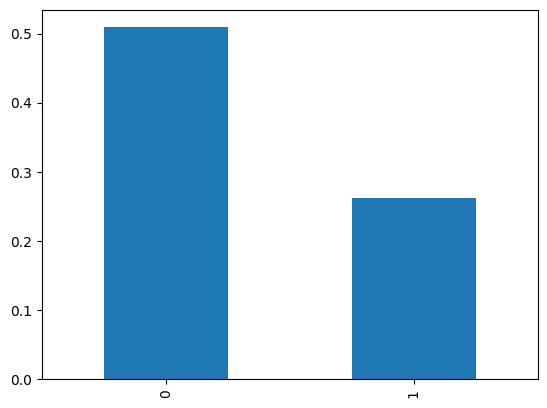

In [26]:
relative_frequencies = np.array([relative_frequenciesFair,relative_frequenciesUnfair])
graphdata = pd.Series(relative_frequencies)
print(graphdata.plot(kind = "bar"))
#Note Fair = 0 on the graph, and Unfair = 1

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [27]:
DieFaces1 = np.array([1,2,3,4,5,6])
DieFaces2 = np.array([1,2,3,4,5,6])
DieFaces3 = np.array([1,2,3,4,5,6])
aDie1 = MonteCarlo.Die(DieFaces1)
aDie2 = MonteCarlo.Die(DieFaces2)
aDie3 = MonteCarlo.Die(DieFaces3)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [29]:
aDie1.change_side_weight(6, 5)
print(aDie1.die_currentstate())

       weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [30]:
aDie2.change_side_weight(1,5)
print(aDie2.die_currentstate())

       weights
faces         
1          5.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [32]:
myGame1Dice = [aDie3, aDie3, aDie3, aDie3,aDie3]
myGame1 = MonteCarlo.Game(myGame1Dice)
myGame1.play(10000)

#Show result of the game
print(myGame1.play_result())

             1  2  3  4  5
Roll Number               
1            2  4  5  3  2
2            5  3  6  2  3
3            4  4  6  3  4
4            3  4  3  4  4
5            4  2  4  2  1
...         .. .. .. .. ..
9996         5  6  5  2  6
9997         6  5  5  3  6
9998         6  1  5  5  2
9999         5  4  6  3  6
10000        2  1  5  5  6

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [34]:
myGame2Dice = [aDie1, aDie2, aDie3, aDie3,aDie3]
myGame2 = MonteCarlo.Game(myGame2Dice)
myGame2.play(10000)

print(myGame2.play_result())

             1  2  3  4  5
Roll Number               
1            6  3  2  1  2
2            2  6  1  5  2
3            6  5  2  1  4
4            5  4  4  3  3
5            6  5  6  5  3
...         .. .. .. .. ..
9996         4  5  6  1  3
9997         2  4  3  4  4
9998         1  1  5  2  5
9999         4  6  2  3  6
10000        5  4  1  4  4

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Axes(0.125,0.11;0.775x0.77)


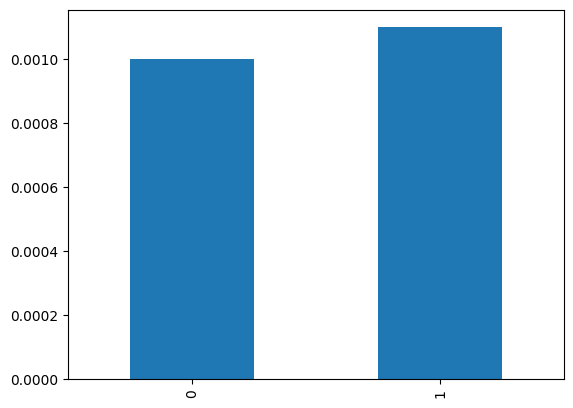

In [35]:
myAnalyzer1 = MonteCarlo.Analyzer(myGame1)
myAnalyzer2 = MonteCarlo.Analyzer(myGame2)
frequencies1 = (myAnalyzer1.jackpot())/10000
frequencies2 = (myAnalyzer2.jackpot())/10000

frequencies = np.array([frequencies1,frequencies2])
graphdata = pd.Series(frequencies)
print(graphdata.plot(kind = "bar"))
#Note 0 axis label is the frequencies for game 1 (all fair), and 1 axis label is the frequencies for game 2

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [38]:
#reading in the data
english_letters = pd.read_csv('english_letters.txt', names = ["letter", "frequency"], sep=" ", header = None)

#np array of letters
myLetters = np.array(english_letters.letter)

#initial die
myLetterDie = MonteCarlo.Die(myLetters)

#weighting
for i in myLetters:
    index = english_letters[english_letters['letter'] == i].index[0]
    myLetterDie.change_side_weight(i, int(english_letters["frequency"][index])) 

In [43]:
#showing the current die
print(myLetterDie.die_currentstate())

           weights
faces             
E      529117365.0
T      390965105.0
A      374061888.0
O      326627740.0
I      320410057.0
N      313720540.0
S      294300210.0
R      277000841.0
H      216768975.0
L      183996130.0
D      169330528.0
C      138416451.0
U      117295780.0
M      110504544.0
F       95422055.0
G       91258980.0
P       90376747.0
W       79843664.0
Y       75294515.0
B       70195826.0
V       46337161.0
K       35373464.0
J        9613410.0
X        8369915.0
Z        4975847.0
Q        4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [40]:
#play letter game 
myLetterDice = [myLetterDie, myLetterDie, myLetterDie, myLetterDie]
myLetterGame = MonteCarlo.Game(myLetterDice)
myLetterGame.play(1000)

In [44]:
#showing the play result
print(myLetterGame.play_result("narrow"))

                       Outcomes
Roll Number Die Number         
1           1                 T
2           1                 N
3           1                 H
4           1                 R
5           1                 R
...                         ...
996         4                 T
997         4                 N
998         4                 G
999         4                 D
1000        4                 D

[4000 rows x 1 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [45]:
#read in the data
scrabble_words = pd.read_csv('scrabble_words.txt', names = ["word"], header = None)
scrabble_words_list = list(scrabble_words.word)

In [69]:
myLetterAnalyzer = MonteCarlo.Analyzer(myLetterGame)
LetterPermutations = myLetterAnalyzer.permutation_count()


#get a df without zero values, aka all of the permutations that could be an english word
LetterPermutations2 = LetterPermutations[LetterPermutations['Counts'] != 0]

my_words = [] #a list to keep the possible words from the permutation
for i in LetterPermutations2.index:
    alist = list(i)
    string = ''
    for a in alist:
        string += a
    my_words.append(string)

#convert lists two sets so we can get the difference in their elements
my_words_set = set(my_words)
scrabble_words_list_set = set(scrabble_words_list)
wordcount =  len(my_words_set & scrabble_words_list_set) #& gets us items in both sets

print(wordcount)

39


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).


***The game with 5 dice produces 8 words so the game with 3 Dice produces more words, with 39 words***

In [73]:
#repeating play with 5 dice
myLetterDice2 = [myLetterDie, myLetterDie, myLetterDie, myLetterDie,myLetterDie]
myLetterGame2 = MonteCarlo.Game(myLetterDice2)
myLetterGame2.play(1000)

myLetterAnalyzer2 = MonteCarlo.Analyzer(myLetterGame2)
LetterPermutations_ = myLetterAnalyzer2.permutation_count()

In [91]:
#get a df without zero values
LetterPermutations2_ = LetterPermutations_[LetterPermutations_['Counts'] != 0]

my_words2 = [] #a list to keep the possible words from the permutation
for i in LetterPermutations2_.index:
    alist = list(i)
    string = ''
    for a in alist:
        string += a
    my_words2.append(string)

In [94]:
#get the count
mycount = 0 
for i in my_words2:
    if i in scrabble_words_list:
        mycount += 1
print(mycount)

8


In [95]:
my_words_set2 = set(my_words2)
wordcount2 =  len(my_words_set2 & scrabble_words_list_set) #& gets us items in both sets
print(wordcount2)

8
